In [186]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_1D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
def exponent(z, lamb):
    return lamb*1j*(z**2 + 2/(1+z**2))
def gradh(z, lamb):
    return np.conj(-lamb*1j*(2*z - 2*2*z/(1+z**2)**2))

In [196]:
# init model
lamb = 1
delta = 0.1
Nstep = 109
dt = 0.5e-2
critpts = [0,np.sqrt(np.sqrt(2)-1),-np.sqrt(np.sqrt(2)-1),1j*np.sqrt(np.sqrt(2)+1),-1j*np.sqrt(np.sqrt(2)+1)]
domain = [-2,2]
Npts_init = 50

contour = realcontour_1D(Npts_init,domain)

plind = plmodel(contour, exponent, grad=gradh, expargs=[lamb])

In [212]:
plind.descend(dt, Nstep, delta, -20)

A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found
A pole was found


KeyboardInterrupt: 

In [ ]:
# Check for isolated points
point_inds= np.size(plind.contour.points)
print(point_inds)
simp_set=set(plind.contour.simplices.flatten())
if np.array_equal(simp_set, set(range(0,point_inds))): 
    # Do somthing 
    print("match")
else:
    print("ruh roh")
edge_set=set(plind.contour.edges.flatten())
if np.array_equal(simp_set, set(range(0,point_inds))): 
    # Do somthing 
    print("match")
else:
    print("ruh roh")

In [ ]:
# Plot final contour and trajectory
N = 100
cont_space = 1
u, v = np.meshgrid(np.linspace(domain[0], domain[1], N), np.linspace(domain[0], domain[1], N), indexing='ij')
z = u + 1j*v

fig, ax = plt.subplots()
ax.set_title('$h(z)$, $\\lambda$ = {}'.format(lamb))
ax.set_xlabel("Re($z$)")
ax.set_ylabel("Im($z$)")
ax.set_ylim(domain[0], domain[1])
ax.set_xlim(domain[0], domain[1])
# Plot h
im = ax.pcolormesh(u, v, np.real(exponent(z, lamb)))
fig.colorbar(im, ax=ax)
for p0 in critpts:
    # Plot critical points
    ax.scatter(p0.real, p0.imag, color='w')
    # Plot contours of expfun.imag passing through p0, p1
    ax.contour(u, v, exponent(z, lamb).imag, [exponent(p0, lamb).imag], colors='w', alpha=0.5)
# Plot progress towards Lefschetz thimble
#for k in np.linspace(100, plind.trajectory.shape[0], plind.trajectory.shape[0]//cont_space, endpoint=False):
#for k in np.linspace(Nstep-6, Nstep-1, num=5):
#    k = int(k)
#    ax.plot(plind.trajectory[k].points.real[1:-1], plind.trajectory[k].points.imag[1:-1], 'r.')
ax.plot(plind.trajectory[-2].points.real[1:-1], plind.trajectory[-2].points.imag[1:-1], 'r.')
ax.plot(plind.trajectory[-1].points.real[1:-1], plind.trajectory[-1].points.imag[1:-1], 'b*')
plt.show()

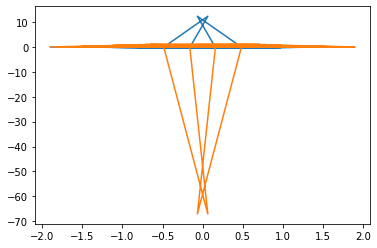

In [155]:
intfun = plind.get_intfun()

plt.figure()
plt.plot(plind.contour.points.real, intfun(plind.contour.points, lamb).real)
plt.plot(plind.contour.points.real, intfun(plind.contour.points, lamb).imag)
plt.show()